<a href="https://colab.research.google.com/github/Daniyal56/FaceRecogniton/blob/master/image_classification_catVsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

In [2]:
files.upload()
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d muhammadwaqaskiyani/catvsdog

 96% 209M/218M [00:05<00:00, 46.9MB/s]
100% 218M/218M [00:05<00:00, 40.9MB/s]


In [4]:
!unzip catvsdog.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/training_set/cats/cat.370.jpg  
  inflating: dataset/training_set/cats/cat.3700.jpg  
  inflating: dataset/training_set/cats/cat.3701.jpg  
  inflating: dataset/training_set/cats/cat.3702.jpg  
  inflating: dataset/training_set/cats/cat.3703.jpg  
  inflating: dataset/training_set/cats/cat.3704.jpg  
  inflating: dataset/training_set/cats/cat.3705.jpg  
  inflating: dataset/training_set/cats/cat.3706.jpg  
  inflating: dataset/training_set/cats/cat.3707.jpg  
  inflating: dataset/training_set/cats/cat.3708.jpg  
  inflating: dataset/training_set/cats/cat.3709.jpg  
  inflating: dataset/training_set/cats/cat.371.jpg  
  inflating: dataset/training_set/cats/cat.3710.jpg  
  inflating: dataset/training_set/cats/cat.3711.jpg  
  inflating: dataset/training_set/cats/cat.3712.jpg  
  inflating: dataset/training_set/cats/cat.3713.jpg  
  inflating: dataset/training_set/cats/cat.3714.jpg  
  inflating: dataset/training_set

In [0]:
train_dir = '/content/dataset/training_set'
test_dir = '/content/dataset/test_set'

In [0]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
model = tensorflow.keras.models.Sequential([
                                            tensorflow.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Flatten(),
                                            tensorflow.keras.layers.Dense(512,activation='relu'),
                                            tensorflow.keras.layers.Dense(1)
])

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])

In [11]:
history = model.fit_generator(train_generator,steps_per_epoch=30,epochs=30,validation_data=val_generator,validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
30/30 [==============================] - 4s 147ms/step - loss: 0.7869 - acc: 0.5550 - val_loss: 0.6854 - val_acc: 0.5480
Epoch 2/30
30/30 [==============================] - 4s 144ms/step - loss: 0.7044 - acc: 0.5100 - val_loss: 0.6836 - val_acc: 0.5370
Epoch 3/30
30/30 [==============================] - 4s 146ms/step - loss: 0.7099 - acc: 0.5283 - val_loss: 0.6946 - val_acc: 0.5090
Epoch 4/30
30/30 [==============================] - 4s 145ms/step - loss: 0.6958 - acc: 0.5783 - val_loss: 0.6876 - val_acc: 0.5840
Epoch 5/30
30/30 [==============================] - 4s 144ms/step - loss: 0.6780 - acc: 0.5733 - val_loss: 0.6743 - val_acc: 0.5770
Epoch 6/30
30/30 [==============================] - 4s 146ms/step - loss: 0.6748 - acc: 0.6033 - val_loss: 0.6887 - val_acc: 0.6020
Epoch 7/30
30/30 [==============================] - 4s 146ms/step - loss: 0.6679 - acc: 0.6150 - val_loss: 0.6900 - val_acc: 0.6110


In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epoch = range(1, len(acc) + 1)

In [0]:
import matplotlib.pyplot as plt

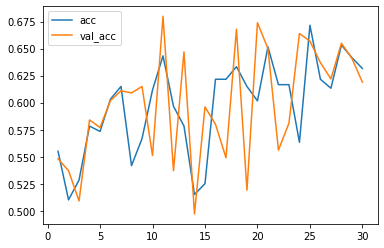

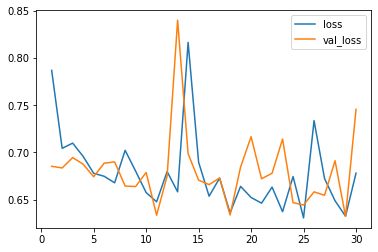

In [16]:
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.legend()
plt.show()

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.legend()
plt.show()

In [0]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

In [0]:
from tensorflow.keras.preprocessing import image
import os

In [0]:
fnames = [os.path.join('/content/dataset/test_set/cats/',fname) for fname in os.listdir('/content/dataset/training_set/cats/')] 

In [38]:
!ls fnames[3]

ls: cannot access 'fnames[3]': No such file or directory


In [0]:
img_path = fnames[3]
img = image.load_img(path='/content/dataset/test_set/cats/cat.4001.jpg',target_size=(150,150))


In [42]:
x = image.img_to_array(img)
x.shape

(150, 150, 3)

In [43]:
x = x.reshape((1,)+ x.shape)
x.shape

(1, 150, 150, 3)

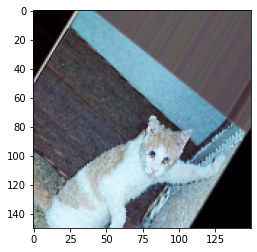

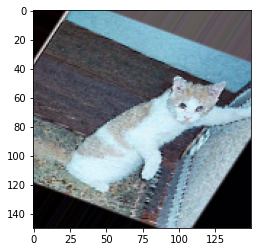

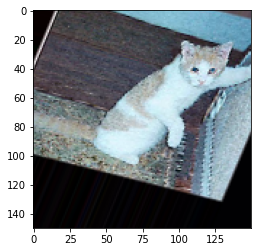

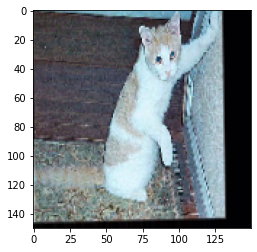

In [44]:
i = 0
for batch in datagen.flow(x,batch_size=1):
  plt.figure(i)
  plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4==0:
    break
plt.show()

In [0]:
model = tensorflow.keras.models.Sequential([tensorflow.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                            tensorflow.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Flatten(),
                                            tensorflow.keras.layers.Dropout(0.5),
                                            tensorflow.keras.layers.Dense(512,activation='relu'),
                                            tensorflow.keras.layers.Dense(1)
                                            
])

In [0]:
model.compile(optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [48]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [49]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=val_generator,validation_steps=50)


Epoch 1/30
100/100 [==============================] - 16s 162ms/step - loss: 0.7508 - acc: 0.5545 - val_loss: 0.6611 - val_acc: 0.6060
Epoch 2/30
100/100 [==============================] - 16s 162ms/step - loss: 0.6890 - acc: 0.5760 - val_loss: 0.7135 - val_acc: 0.5800
Epoch 3/30
100/100 [==============================] - 16s 160ms/step - loss: 0.6715 - acc: 0.5945 - val_loss: 0.6624 - val_acc: 0.6370
Epoch 4/30
100/100 [==============================] - 16s 160ms/step - loss: 0.6729 - acc: 0.5955 - val_loss: 0.7247 - val_acc: 0.6200
Epoch 5/30
100/100 [==============================] - 16s 162ms/step - loss: 0.6723 - acc: 0.6040 - val_loss: 0.7303 - val_acc: 0.6000
Epoch 6/30
100/100 [==============================] - 16s 162ms/step - loss: 0.6569 - acc: 0.6330 - val_loss: 0.6695 - val_acc: 0.6710
Epoch 7/30
100/100 [==============================] - 16s 160ms/step - loss: 0.6506 - acc: 0.6460 - val_loss: 0.6531 - val_acc: 0.6840
Epoch 8/30
100/100 [==============================] - 1

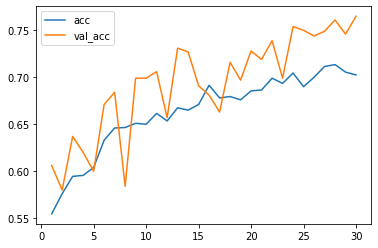

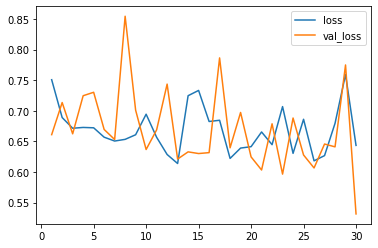

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(1, len(acc) + 1)

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.legend()
plt.show()

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.legend()
plt.show()

In [0]:
model = tensorflow.keras.models.Sequential([tensorflow.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                            tensorflow.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                            tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                            tensorflow.keras.layers.Flatten(),
                                            tensorflow.keras.layers.Dropout(0.5),
                                            tensorflow.keras.layers.Dense(512,activation='relu'),
                                            tensorflow.keras.layers.Dense(1,activation='sigmoid')
                                            
])

In [0]:
model.compile(optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])


In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [56]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [57]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=val_generator,validation_steps=50)


Epoch 1/100
100/100 [==============================] - 16s 163ms/step - loss: 0.6914 - acc: 0.5130 - val_loss: 0.6831 - val_acc: 0.5650
Epoch 2/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6823 - acc: 0.5580 - val_loss: 0.6567 - val_acc: 0.5940
Epoch 3/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6776 - acc: 0.5545 - val_loss: 0.6572 - val_acc: 0.6160
Epoch 4/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6552 - acc: 0.6020 - val_loss: 0.6562 - val_acc: 0.6090
Epoch 5/100
100/100 [==============================] - 16s 159ms/step - loss: 0.6525 - acc: 0.6100 - val_loss: 0.6522 - val_acc: 0.5780
Epoch 6/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6439 - acc: 0.6310 - val_loss: 0.6777 - val_acc: 0.5610
Epoch 7/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6281 - acc: 0.6365 - val_loss: 0.6475 - val_acc: 0.6240
Epoch 8/100
100/100 [===========================

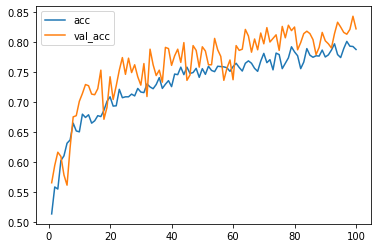

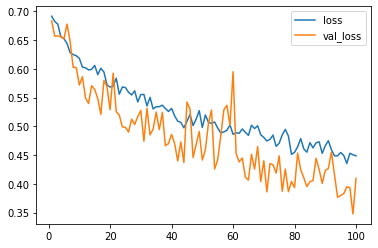

In [58]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(1, len(acc) + 1)

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.legend()
plt.show()

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.legend()
plt.show()

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

In [60]:
convnet = VGG16(include_top=False,weights='imagenet',input_shape=(150,150,3))

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
model = tensorflow.keras.models.Sequential([convnet,                                        
                                            tensorflow.keras.layers.Flatten(),
                                            tensorflow.keras.layers.Dropout(0.5),
                                            tensorflow.keras.layers.Dense(512,activation='relu'),
                                            tensorflow.keras.layers.Dense(1,activation='sigmoid')
                                            
])

In [0]:
model.compile(optimizer=tensorflow.keras.optimizers.RMSprop(lr=2e-4),loss='binary_crossentropy',metrics=['acc'])


In [63]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=val_generator,validation_steps=50)


Epoch 1/30
100/100 [==============================] - 20s 202ms/step - loss: 0.7290 - acc: 0.4995 - val_loss: 0.6932 - val_acc: 0.4920
Epoch 2/30
100/100 [==============================] - 20s 201ms/step - loss: 0.6932 - acc: 0.4900 - val_loss: 0.6931 - val_acc: 0.4990
Epoch 3/30
100/100 [==============================] - 20s 204ms/step - loss: 0.6932 - acc: 0.4755 - val_loss: 0.6931 - val_acc: 0.5060
Epoch 4/30
100/100 [==============================] - 20s 202ms/step - loss: 0.6932 - acc: 0.5055 - val_loss: 0.6932 - val_acc: 0.4940
Epoch 5/30
100/100 [==============================] - 20s 202ms/step - loss: 0.6932 - acc: 0.4895 - val_loss: 0.6931 - val_acc: 0.5020
Epoch 6/30
100/100 [==============================] - 20s 202ms/step - loss: 0.6931 - acc: 0.5130 - val_loss: 0.6931 - val_acc: 0.5060
Epoch 7/30
100/100 [==============================] - 20s 201ms/step - loss: 0.6932 - acc: 0.4975 - val_loss: 0.6931 - val_acc: 0.5120
Epoch 8/30
100/100 [==============================] - 2

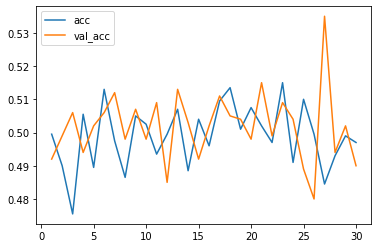

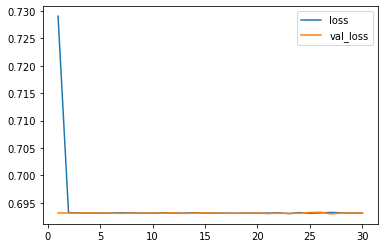

In [64]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(1, len(acc) + 1)

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.legend()
plt.show()

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.legend()
plt.show()

In [0]:
model = tensorflow.keras.models.Sequential([convnet,                                        
                                            tensorflow.keras.layers.Flatten(),
                                            tensorflow.keras.layers.Dropout(0.5),
                                            tensorflow.keras.layers.Dense(512,activation='relu'),
                                            tensorflow.keras.layers.Dense(1,activation='sigmoid')
                                            
])

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [67]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
model.compile(optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])


In [69]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=val_generator,validation_steps=50)


Epoch 1/100
100/100 [==============================] - 20s 205ms/step - loss: 0.6931 - acc: 0.5130 - val_loss: 0.6932 - val_acc: 0.4870
Epoch 2/100
100/100 [==============================] - 20s 200ms/step - loss: 0.6931 - acc: 0.5145 - val_loss: 0.6932 - val_acc: 0.4950
Epoch 3/100
100/100 [==============================] - 20s 201ms/step - loss: 0.6932 - acc: 0.4980 - val_loss: 0.6931 - val_acc: 0.5080
Epoch 4/100
100/100 [==============================] - 20s 201ms/step - loss: 0.6931 - acc: 0.5020 - val_loss: 0.6932 - val_acc: 0.4870
Epoch 5/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6931 - acc: 0.5155 - val_loss: 0.6932 - val_acc: 0.4800
Epoch 6/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6931 - acc: 0.5075 - val_loss: 0.6932 - val_acc: 0.4970
Epoch 7/100
100/100 [==============================] - 20s 205ms/step - loss: 0.6932 - acc: 0.4945 - val_loss: 0.6931 - val_acc: 0.5050
Epoch 8/100
100/100 [===========================

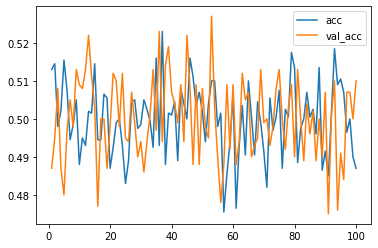

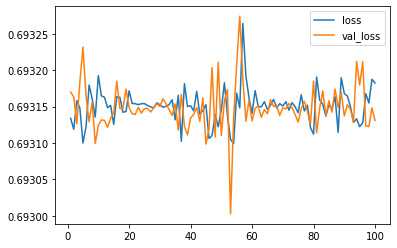

In [70]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(1, len(acc) + 1)

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.legend()
plt.show()

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.legend()
plt.show()

In [71]:
convnet.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
convnet.trainable = True

set_trainable = False
for layers in convnet.layers:
  if layers.name == 'block1_conv1':
    set_trainable = True
    if set_trainable:
      layers.trainable = True
    else:
      layers.trainable = False

In [0]:
model = tensorflow.keras.models.Sequential([convnet,                                        
                                            tensorflow.keras.layers.Flatten(),
                                            tensorflow.keras.layers.Dropout(0.5),
                                            tensorflow.keras.layers.Dense(512,activation='relu'),
                                            tensorflow.keras.layers.Dense(1,activation='sigmoid')
                                            
])

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [76]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
model.compile(optimizer=tensorflow.keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])


In [78]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=val_generator,validation_steps=50)


Epoch 1/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6932 - acc: 0.5005 - val_loss: 0.6932 - val_acc: 0.4850
Epoch 2/100
100/100 [==============================] - 20s 197ms/step - loss: 0.6931 - acc: 0.5180 - val_loss: 0.6931 - val_acc: 0.5070
Epoch 3/100
100/100 [==============================] - 20s 197ms/step - loss: 0.6932 - acc: 0.4990 - val_loss: 0.6931 - val_acc: 0.5190
Epoch 4/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6932 - acc: 0.4880 - val_loss: 0.6931 - val_acc: 0.5180
Epoch 5/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6932 - acc: 0.4950 - val_loss: 0.6931 - val_acc: 0.4970
Epoch 6/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6932 - acc: 0.4855 - val_loss: 0.6931 - val_acc: 0.4890
Epoch 7/100
100/100 [==============================] - 20s 199ms/step - loss: 0.6932 - acc: 0.4975 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 8/100
100/100 [===========================

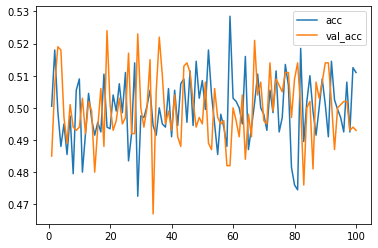

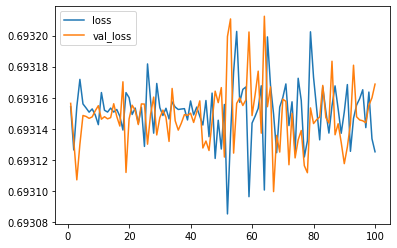

In [79]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(1, len(acc) + 1)

plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.legend()
plt.show()

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.legend()
plt.show()

In [0]:
model.save('complete_model.h5')